# Imbalance Classifcation

Table Of Contents
- Data
- EDA
- Model 1
- Model 2

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [2]:
wine = pd.read_csv('/content/white_wine.csv')

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


> ## EDA

We will be doing some EDA to check the target variabel distribution. The target variabel distribution is
1. (+) a good quality wine : quality > 6 (18.9%)
1. (-) a bad quality wine : quality <= 6 (81.1%)

You will find that the distribution is imbalanced with 18.9 % positive class and 81.1 % negative class. The minority class is the good quality one, we migh more interest to detect a wine with good quality than the common one.

In [4]:
wine['alcohol'].fillna(wine['alcohol'].mean(),inplace = True)
wine['label'] = np.where(wine['quality']>6,1,0)
wine['label'].value_counts()/wine.shape[0]*100

/tmp/ipython-input-694351182.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wine['alcohol'].fillna(wine['alcohol'].mean(),inplace = True)


,count
label,
0,81.153846
1,18.846154


We will develope the model only using two features alcohol and density. Using the scatterplot you can see how those feature can differentiate the wine quality. Genrally, wine with good quality has high alcohol and high density.



Text(0, 0.5, 'Density')

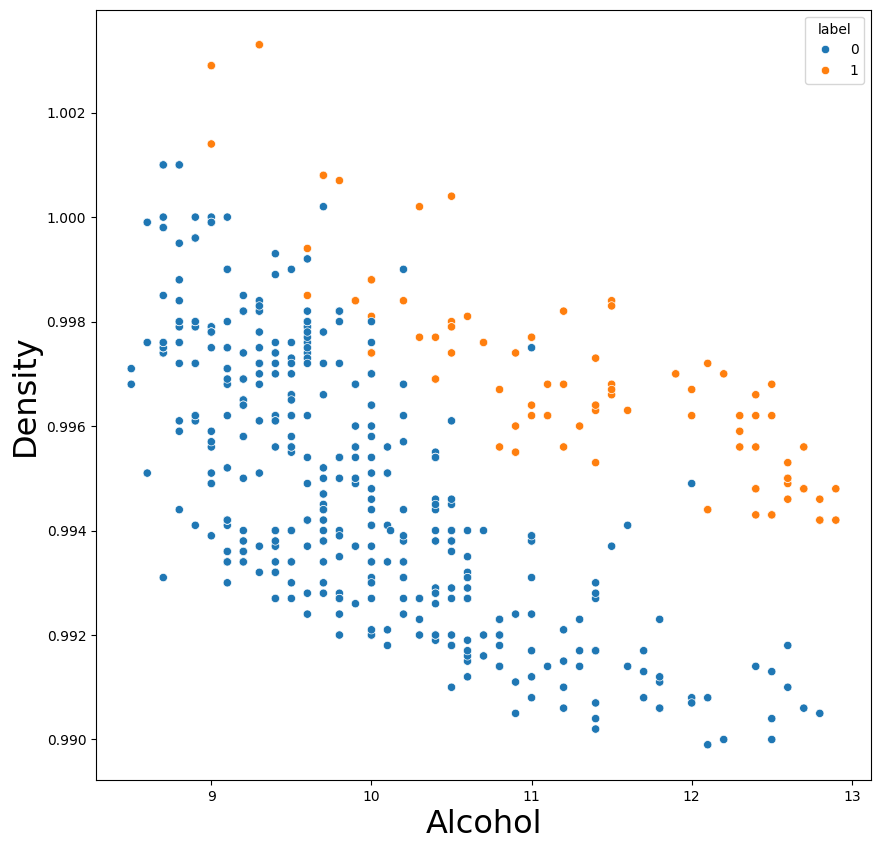

In [5]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'alcohol', y = 'density',data = wine, hue = 'label')
plt.xlabel('Alcohol', fontsize = 23)
plt.ylabel('Density', fontsize = 23)

> ## Data Splitting

In [6]:
X = wine[['density','alcohol']]
y = wine['label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state = 2020)

> ## MODEL 1 : without polynomial

In [8]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [9]:
y_pred = logreg.predict(X_test)
print('performance \n',classification_report(y_test,y_pred))

performance 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       106
           1       0.69      0.38      0.49        24

    accuracy                           0.85       130
   macro avg       0.78      0.67      0.70       130
weighted avg       0.84      0.85      0.84       130



From illustration abovel, you can see the performance of the machine learning model. Let's say our concern is to these three metrics:
1. precision (+) : 0.69
1. recall (+) : 0.38
1. f1-score (+) : 0.49

<br>
next, we will do the modeling process with adding polynomial features and see the changes.

> ## MODEL 2 : with polynomial

In [10]:
poly = PolynomialFeatures(degree = 3, interaction_only=False,include_bias=False)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [11]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train_poly,y_train)

LogisticRegression(max_iter=1000)

In [12]:
y_pred = logreg.predict(X_test_poly)
print('performance \n',classification_report(y_test,y_pred))

performance 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0.95      0.88      0.91        24

    accuracy                           0.97       130
   macro avg       0.96      0.93      0.95       130
weighted avg       0.97      0.97      0.97       130



From illustration abovel, you can see the performance improvement of the machine learning model. The changes of the three metrics:
1. precision (+) : from 0.69 to 0.95
1. recall (+) : from 0.38 to 0.88
1. f1-score (+) : from 0.49 to 0.91

> # Resampling Method : Non Performing Loan

To use some balancing technique you will need to install imblearn library.

In [13]:
!pip install imblearn

In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report, f1_score
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

Dataset used in this illustration is bankloan.csv. with :
1. target : defaut
1. features : employ, debtinc, creddebt, othdebt

In [18]:
bankloan = pd.read_csv('bankloan.csv')

In [19]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [20]:
X = bankloan[fitur]
y = bankloan[target]

> ## EDA

In [21]:
bankloan['default'].value_counts()/bankloan.shape[0]*100

,count
default,
0,73.857143
1,26.142857


This can be seen as imbalance classification problem because the target variabel distribution is imbalanced:
1. (+) default (26.1%)
1. (-) non-default (73.9%)

> ## Data Splitting

Data splitting scenario is train 60%, validation 20%, test 20%.

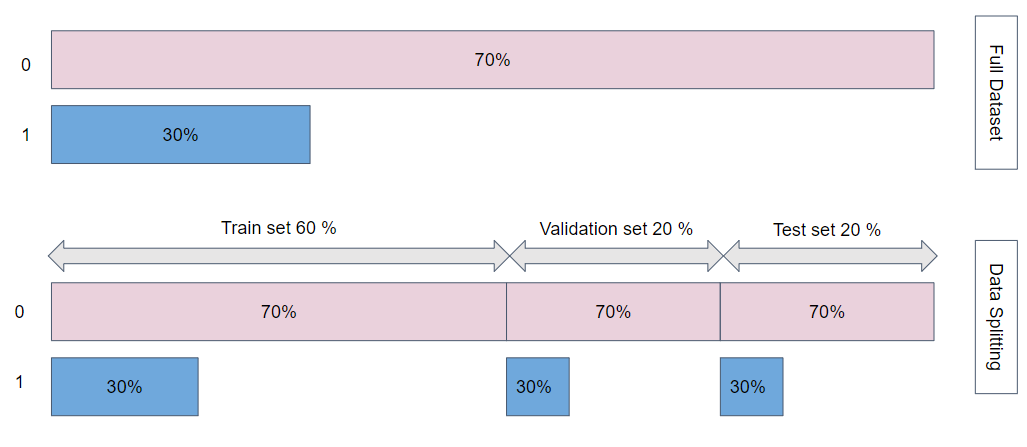

In [22]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 1899)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    stratify = y_train_val,
    test_size = 0.25,
    random_state = 1899)

In the modeling process we will try some method and choose the best method based on f1 score. Those methods are :
1. logistic regression without any treatment
1. logistic regression that otimized by the threshold
1. logistic regression with random undersampling
1. Penalized logistic regression

> ## No Treatment

scenario :
1. metrics : f1-score
1. benchmark
1. threshold optimization

BENCHMARK

In [23]:
model = LogisticRegression()
model.fit(X_train_val, y_train_val)

LogisticRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       103
           1       0.68      0.41      0.51        37

    accuracy                           0.79       140
   macro avg       0.75      0.67      0.69       140
weighted avg       0.78      0.79      0.77       140



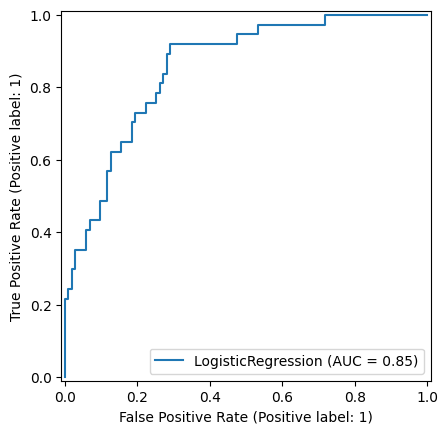

In [30]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

THRESHOLD OPTIMIZATION

In [31]:
model.fit(X_train, y_train)

th_value = [i/100 for i in range(20,60)]
score = 0
score_list = []

for i in th_value:
  y_prob = model.predict_proba(X_val)[:,1]
  y_pred = np.where(y_prob>i,1,0)
  score_temp = f1_score(y_val, y_pred)
  score_list.append(score_temp)

  if score_temp > score :
    score = score_temp

    best_score = score
    best_th = i

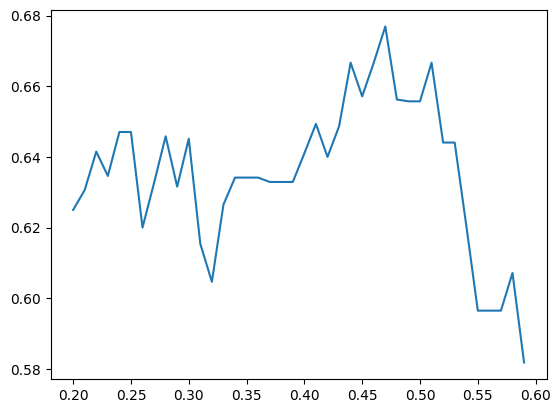

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=th_value, y=score_list)
plt.show()

In [37]:
print('best threshold', best_th)
print('best score', best_score)

best threshold 0.47
best score 0.676923076923077


In [38]:
model.fit(X_train_val, y_train_val)
y_prob = model.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob>best_th,1,0)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       103
           1       0.62      0.43      0.51        37

    accuracy                           0.78       140
   macro avg       0.72      0.67      0.68       140
weighted avg       0.76      0.78      0.76       140



> ## Resampling : Undersampling

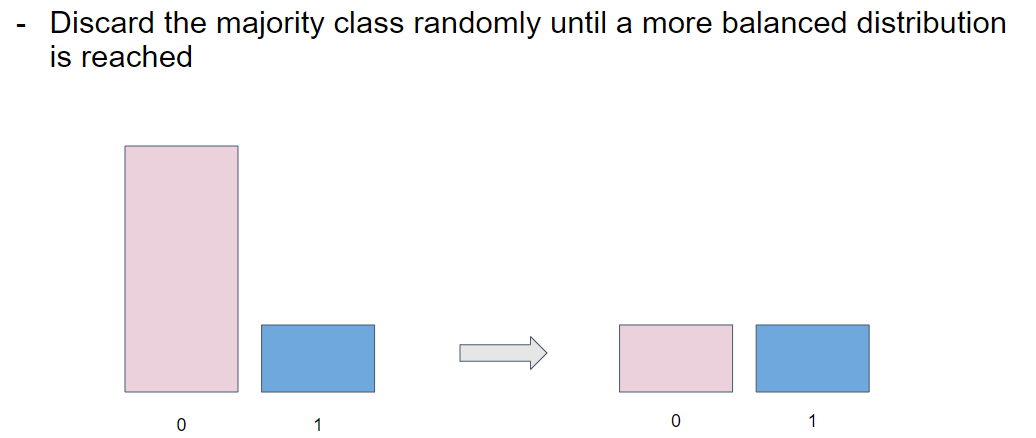

In [40]:
rus = RandomUnderSampler()
X_under, y_under = rus.fit_resample(X_train_val, y_train_val) # undersampling the training set

other method you can try:
1. RandomOverSampler()
1. SMOTE()
1. NearMiss()

In [41]:
model_under = LogisticRegression()
model_under.fit(X_under, y_under)
y_pred = model_under.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81       103
           1       0.52      0.86      0.65        37

    accuracy                           0.75       140
   macro avg       0.73      0.79      0.73       140
weighted avg       0.82      0.75      0.76       140



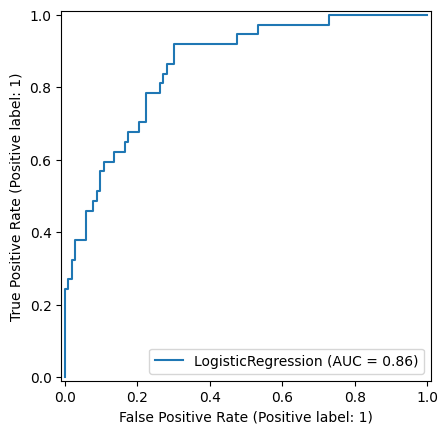

In [45]:
RocCurveDisplay.from_estimator(model_under, X_test, y_test)

> ## Penalized

Make your model paying more attention to the minority class. This method is faster than resampling method you can use "class_weight" arguments in some scikit learn estimator :

- logistic regression
- decision tree
- random forest
- support vector machine

In [46]:
model_balanced = LogisticRegression(class_weight = 'balanced') # penalized 'balanced'
model_balanced.fit(X_train_val, y_train_val)
y_pred = model_balanced.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       103
           1       0.53      0.89      0.67        37

    accuracy                           0.76       140
   macro avg       0.74      0.81      0.74       140
weighted avg       0.84      0.76      0.78       140



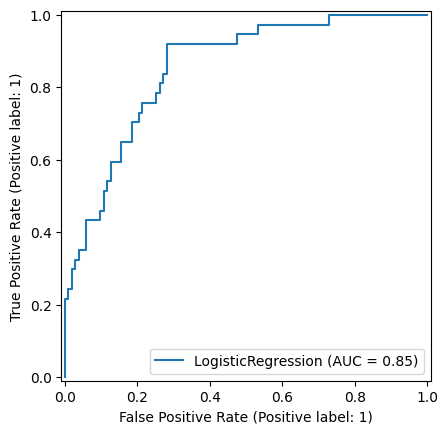

In [47]:
RocCurveDisplay.from_estimator(model_balanced, X_test, y_test)

> ## Summary

In [48]:
f1_no_tr = f1_score(y_test,model.predict(X_test))

y_prob_th = model.predict_proba(X_test)[:,1]
f1_no_tr_th = f1_score(y_test,np.where(y_prob_th > 0.5,1,0))

f1_under = f1_score(y_test,model_under.predict(X_test))
f1_model = f1_score(y_test,model_balanced.predict(X_test))

In [49]:
score_list = [f1_no_tr, f1_no_tr_th, f1_under,f1_model]
model_names = ['default','threshold optimization','random undersampling','algo basaed']
df_summary = pd.DataFrame({
    'method':model_names,
    'score':score_list
})
df_summary

,method,score
0,default,0.508475
1,threshold optimization,0.508475
2,random undersampling,0.646465
3,algo basaed,0.666667


From this summary you can see that we tried several methods to handle imbalance classification problem. The outcome is that a penalized regression can outperform another method for this case. For another case the result may differ.You can try more method as well or even optimized each method using hyperparameter tuning.

> # Combine Cross Validation with Balancing Method

In [51]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report, f1_score

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [52]:
bankloan = pd.read_csv('bankloan.csv')

In [53]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [54]:
X = bankloan[fitur]
y = bankloan[target]

In [55]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 1899)

> ## Resampling : SMOTE

SMOTE

Oversampling Technique

Create synthetic minority data that similar to the real data Technique :
- Synthetic minority oversampling (SMOTE)
- Keep adding synthetic data until a more balanced distribution is reached

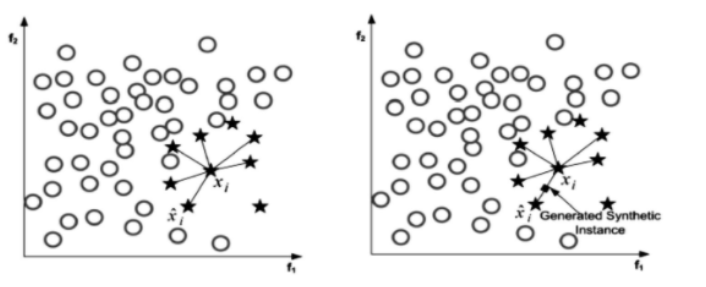

When you want to combine cross validation and any resampling method it's very recommended for you to use Pipeline because it simplyfy your code and make sure that validation set and test set is not involved in the modeling. Using pipline will also work on hyperparameter tuning.

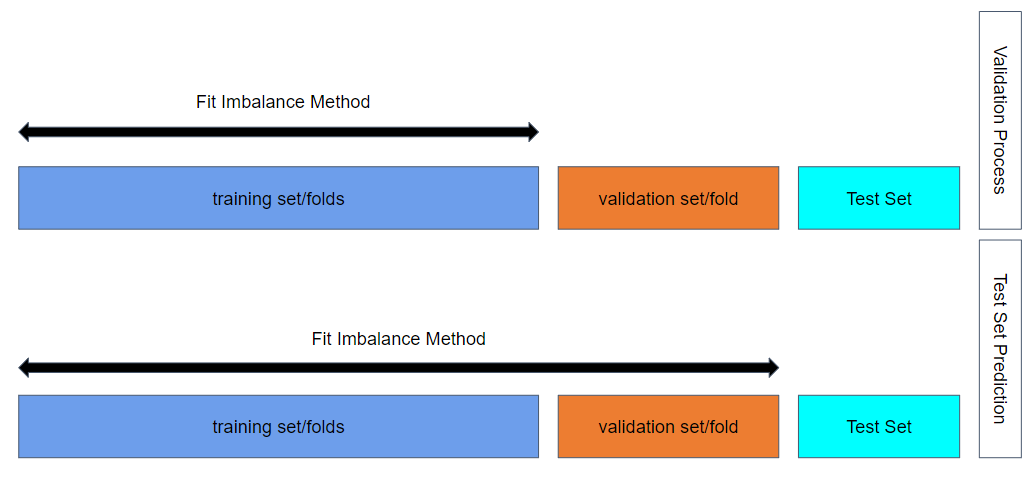

In [56]:
smote = SMOTE()
model = LogisticRegression()

estimator = Pipeline([('balancing',smote),('clf',model)])

In [57]:
skf = StratifiedKFold(n_splits = 5)
model_cv = cross_val_score(estimator, X_train_val, y_train_val, cv = skf, scoring = 'f1')

In [58]:
print('cv score :', model_cv)
print('cv score mean :', model_cv.mean())

cv score : [0.53164557 0.59459459 0.65625    0.74193548 0.54285714]
cv score mean : 0.6134565581885916


> ## Penalized

You will not need pipeline to apply penalized method and it's also faster.

In [59]:
model =  LogisticRegression(class_weight = 'balanced')
skf = StratifiedKFold(n_splits = 5)
model_cv = cross_val_score(model, X_train_val, y_train_val, cv = skf, scoring = 'f1')

In [60]:
print('cv score :', model_cv)
print('cv score mean :', model_cv.mean())

cv score : [0.56097561 0.60273973 0.60869565 0.76190476 0.52173913]
cv score mean : 0.6112109760593906


The better model is the penalized model

# Combine Hyperparameter Tuning with Balancing Method

> ## Hyperparameter Tuning Scenario

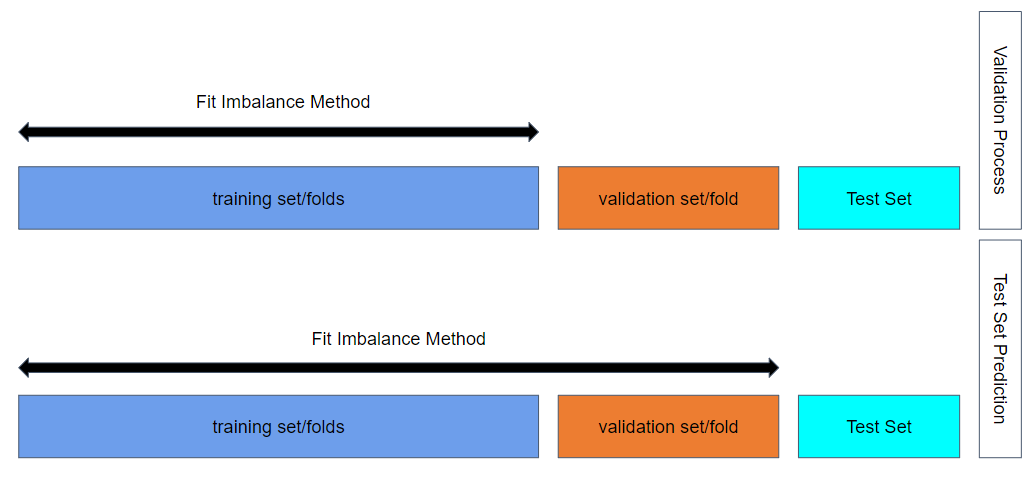

In [61]:
# make the algorithm chains
smote = SMOTE()
model =  LogisticRegression()
estimator = Pipeline([('balancing',smote),('clf',model)])

# hyperparameter space
hyperparam_space = {
    'balancing__k_neighbors':[2,5,10,15,20],
    'clf__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'clf__solver':['liblinear','newton-cg']
}

# stratified cross vaidation
skf = StratifiedKFold(n_splits = 5)

# hyperparameter tuning
grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skf, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)

In [63]:
grid_search.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('balancing', SMOTE()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'balancing__k_neighbors': [2, 5, 10, 15, 20],
                         'clf__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'clf__solver': ['liblinear', 'newton-cg']},
             scoring='f1')

In [64]:
print('best score',grid_search.best_score_)
print('best param',grid_search.best_params_)

best score 0.6216959259300421
best param {'balancing__k_neighbors': 15, 'clf__C': 0.01, 'clf__solver': 'liblinear'}


In [65]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_balancing__k_neighbors,param_clf__C,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020656,0.002453,0.012028,0.000888,2,100.000,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 100, '...",0.543210,0.591549,0.636364,0.741935,0.529412,0.608494,0.076664,32
1,0.030079,0.005014,0.016701,0.006310,2,100.000,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 100, '...",0.536585,0.602740,0.636364,0.750000,0.521739,0.609486,0.081885,26
2,0.022272,0.005892,0.013124,0.000816,2,10.000,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 10, 'c...",0.550000,0.602740,0.628571,0.727273,0.542857,0.610288,0.066721,21
3,0.025209,0.001183,0.013552,0.000423,2,10.000,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 10, 'c...",0.536585,0.594595,0.617647,0.741935,0.521739,0.602500,0.078232,48
4,0.021035,0.002565,0.013403,0.002185,2,1.000,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 1, 'cl...",0.545455,0.586667,0.617647,0.761905,0.521739,0.606682,0.084355,37
5,0.025407,0.002156,0.013128,0.001082,2,1.000,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 1, 'cl...",0.543210,0.602740,0.600000,0.741935,0.555556,0.608688,0.070677,31
6,0.020000,0.002427,0.013334,0.001239,2,0.100,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 0.1, '...",0.550000,0.594595,0.617647,0.750000,0.542857,0.611020,0.074832,17
7,0.025147,0.001979,0.012411,0.000385,2,0.100,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 0.1, '...",0.550000,0.586667,0.626866,0.750000,0.535211,0.609749,0.076970,25
8,0.018503,0.001029,0.012128,0.000339,2,0.010,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 0.01, ...",0.564706,0.632911,0.591549,0.735294,0.567568,0.618406,0.063345,4
9,0.027407,0.003808,0.012933,0.000628,2,0.010,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 0.01, ...",0.536585,0.591549,0.608696,0.769231,0.563380,0.613888,0.081467,8


> ## Model Performance Before Tuning

In [66]:
smote = SMOTE()
model =  LogisticRegression()

estimator = Pipeline([('balancing',smote),('clf',model)])

estimator.fit(X_train_val,y_train_val)
y_pred = estimator.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       103
           1       0.52      0.84      0.64        37

    accuracy                           0.75       140
   macro avg       0.72      0.78      0.72       140
weighted avg       0.82      0.75      0.76       140



> ## Model Performance After Tuning

In [67]:
grid_search.best_estimator_.fit(X_train_val,y_train_val)
y_pred = grid_search.best_estimator_.predict(X_test)

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.68      0.79       103
           1       0.49      0.86      0.63        37

    accuracy                           0.73       140
   macro avg       0.71      0.77      0.71       140
weighted avg       0.82      0.73      0.74       140



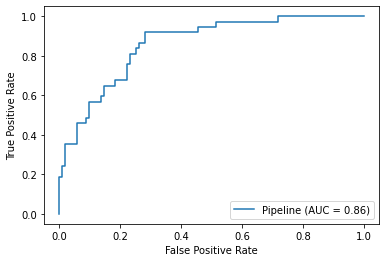

In [ ]:
plot_roc_curve(grid_search.best_estimator_, X_test, y_test)

# TASK :

Repeat the 'Resampling Method : Non Performing Loan' section by adding hyperparameter tuning in each method 'Resampling : Undersampling', and 'Penalized' only.